<a href="https://colab.research.google.com/github/mrusamarasheed9/final-project/blob/main/tcchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Important and required Libraries
!pip install missingno
!pip install scikit-learn
!pip install xgboost
!pip install lightgbm

In [2]:
# Install Important and required Libraries
!pip install catboost
!pip install pydotplus
!pip install skompiler


In [3]:
!pip install numpy==1.26.4

In [4]:
#Import the important and required Libraries and Funcations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib
import graphviz
import pydotplus
import plotly.graph_objects as go
from scipy import stats
from datetime import date
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from skompiler import skompile
import warnings
warnings.simplefilter(action="ignore")

In [5]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv('TCC.csv')

Saving TCC.csv to TCC.csv


**Columns and Rows Information Print Settings** **bold text**


It ensures all columns and rows are visible when printing the DataFrame.

The display width is set to 1000 characters, and floating-point numbers are formatted to three decimal places for clarity

In [6]:
#Ensures that all columns of a Pandas DataFrame are displayed when printed
pd.set_option('display.max_columns', None)
#Sets the display width to 1000 characters
pd.set_option('display.width', 1000)
#Ensures that all rows of the DataFrame are displayed
pd.set_option('display.max_rows', None)
#Formats all floating-point numbers to display three decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Exploratory Data Analysis (EDA):** Perform an (EDA)

It prints the shape of the dataset, data types of each column, and displays both the first and last few rows.

It also checks and displays the count of missing values in each column. (Quantile calculations are commented out)

In [7]:
def check_df(dataframe, head=5):
#Displays the Dataset info of the Dataset, i.e., the number of rows and columns
    print("Dataset Info")
    print(dataframe.shape)
#Shows the data types of each columns
    print("Data Types")
    print(dataframe.dtypes)
#Prints the first Columns Head
    print("Veriables Head")
    print(dataframe.head(head))
#Prints the Columns Tails
    print("Veriables Tail")
    print(dataframe.tail(head))
#Displays the number of missing (NaN) values in each columns
    print("Print NA Values")
    print(dataframe.isnull().sum())
#Computes and prints quantiles
   # print("Print Quantiles")
   # print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

Dataset Info
(7043, 21)
Data Types
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Veriables Head
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No  

In [8]:
df.info() #Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #converts the 'TotalCharges' column to a numeric data type

Text(0.5, 1.0, 'Distribution of Monthly Charges')

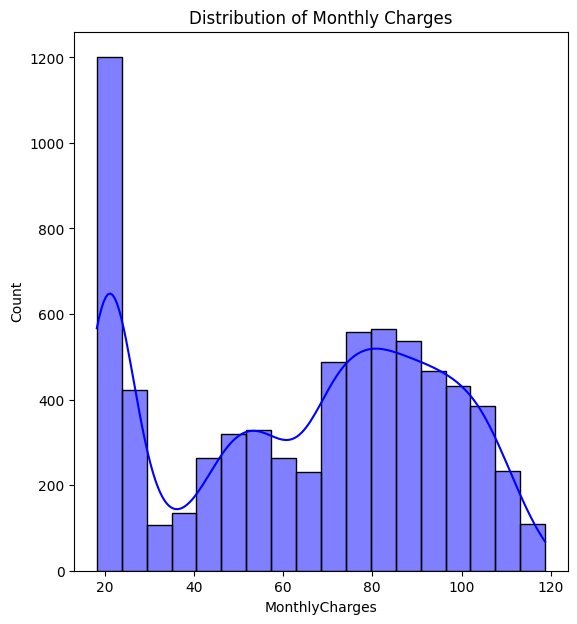

In [10]:
# Distribution of Numerical Variables
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True, color='blue')
plt.title('Distribution of Monthly Charges')

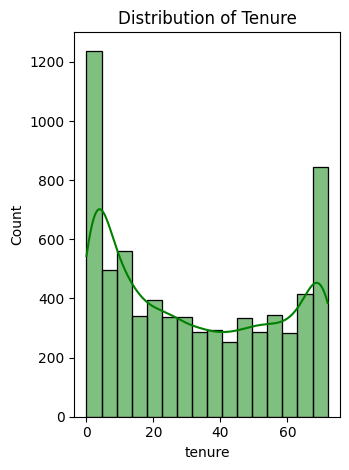

In [11]:
plt.subplot(1, 2, 2)
sns.histplot(df['tenure'], kde=True, color='green')
plt.title('Distribution of Tenure')

plt.tight_layout()
plt.show()

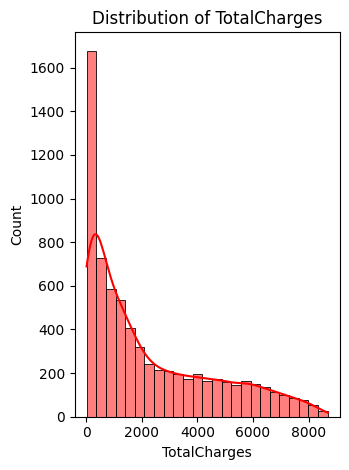

In [12]:
plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'], kde=True, color='red')
plt.title('Distribution of TotalCharges')

plt.tight_layout()
plt.show()

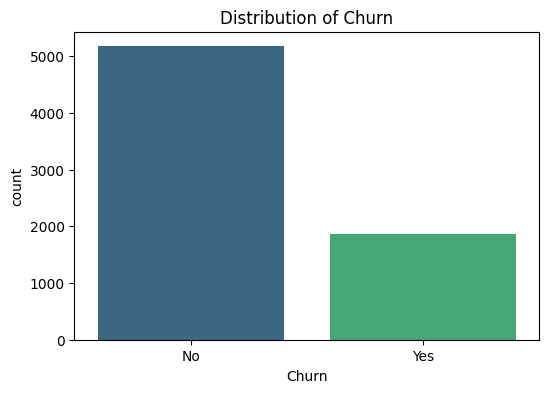

In [13]:
#  Relationship with Target Variable ('Churn')
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

In [14]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
#replace the  missing value with mean
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [16]:
missing_stats = {
    'Missing Cells': df.isnull().sum().sum(),
    'Missing Rows': df[df.isnull().any(axis=1)].shape[0],
    'Avg Missing Cells per Column': df.isnull().sum().mean(),
    'Avg Missing Cells per Row': df.isnull().sum(axis=1).mean()
}

# Display missing statistics
for key, value in missing_stats.items():
    print(f'{key}: {value}')

Missing Cells: 0
Missing Rows: 0
Avg Missing Cells per Column: 0.0
Avg Missing Cells per Row: 0.0


In [17]:
#df.drop('customerID', axis=1, inplace=True)

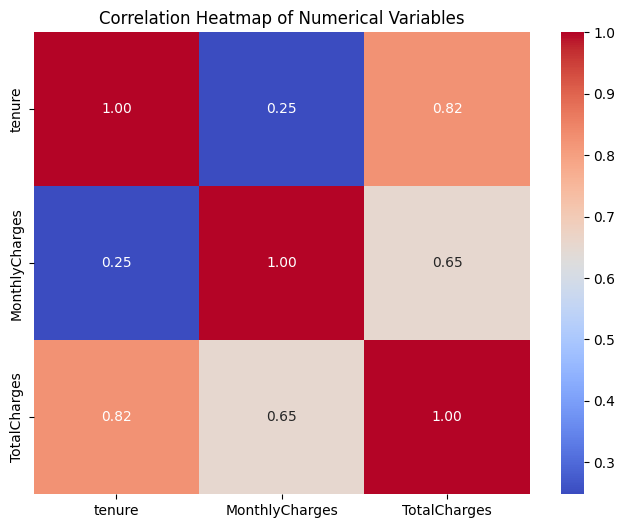

In [18]:
# Correlation heatmap of numerical features
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [19]:
from scipy.stats import chi2_contingency

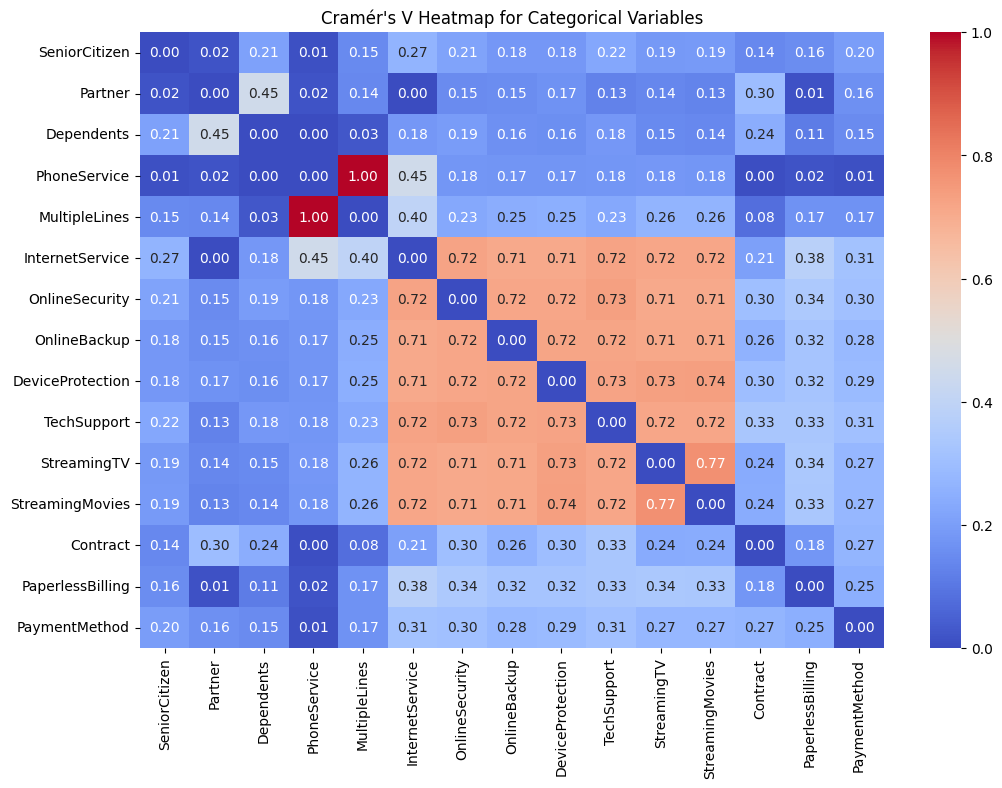

In [20]:
# Function to calculate Cramér's V
def cramers_v(x, y):

    contingency_table = pd.crosstab(x, y) # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table) # Perform Chi-Square test
    n = contingency_table.sum().sum()  # total number of observations
    min_dim = min(contingency_table.shape) - 1  # the minimum of the number of rows - 1, and the number of columns - 1
    return np.sqrt(chi2 / (n * min_dim))
categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents',          # Select only the categorical columns
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

categorical_df = df[categorical_cols]
cramers_matrix = np.zeros((categorical_df.shape[1], categorical_df.shape[1])) # Create an empty matrix for storing Cramér's V values
for i, col1 in enumerate(categorical_df.columns): # Compute Cramér's V for each pair of categorical variables
    for j, col2 in enumerate(categorical_df.columns):
        if i != j:
            cramers_matrix[i, j] = cramers_v(categorical_df[col1], categorical_df[col2])
cramers_df = pd.DataFrame(cramers_matrix, index=categorical_df.columns, columns=categorical_df.columns) # Convert the matrix to a DataFrame for better readability
plt.figure(figsize=(12, 8)) # Set up the figure size
sns.heatmap(cramers_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True) # Plot the heatmap using seaborn
plt.title('Cramér\'s V Heatmap for Categorical Variables') # Display the plot
plt.show()


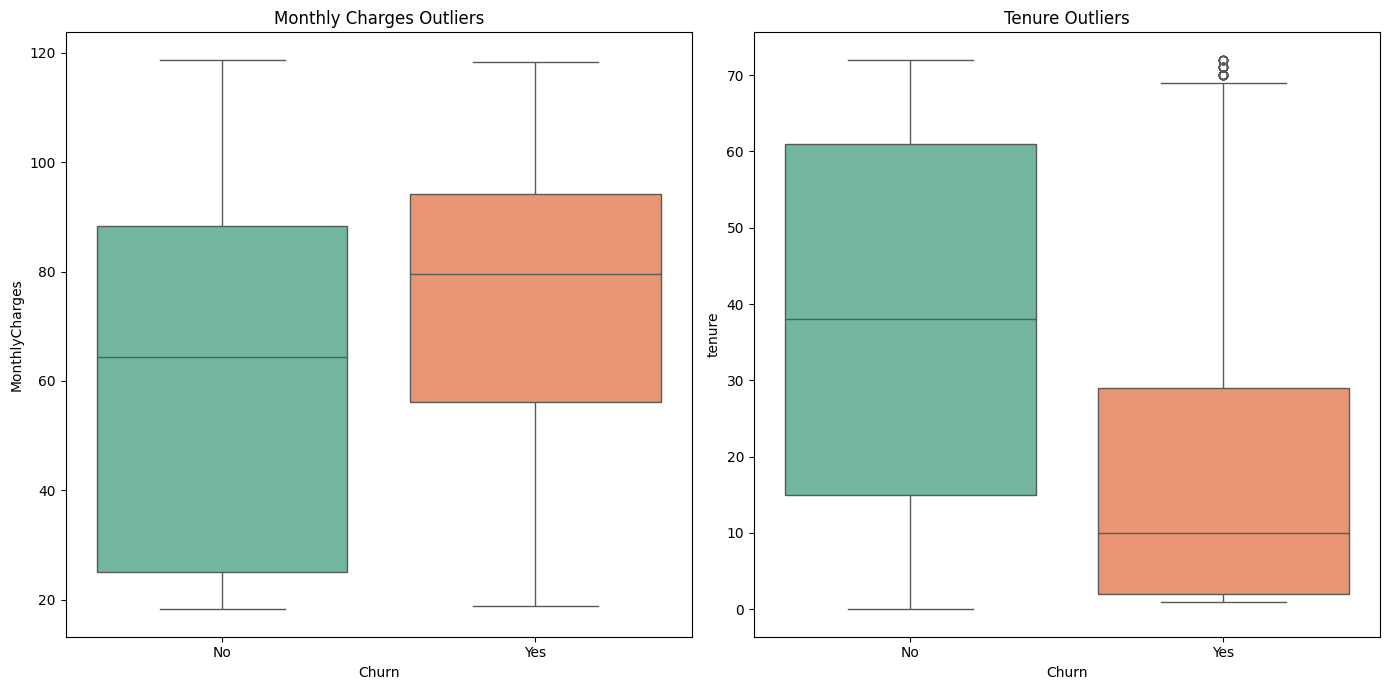

In [21]:
# Outlier Analysis (using Boxplots)
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure Outliers')


plt.tight_layout()
plt.show()

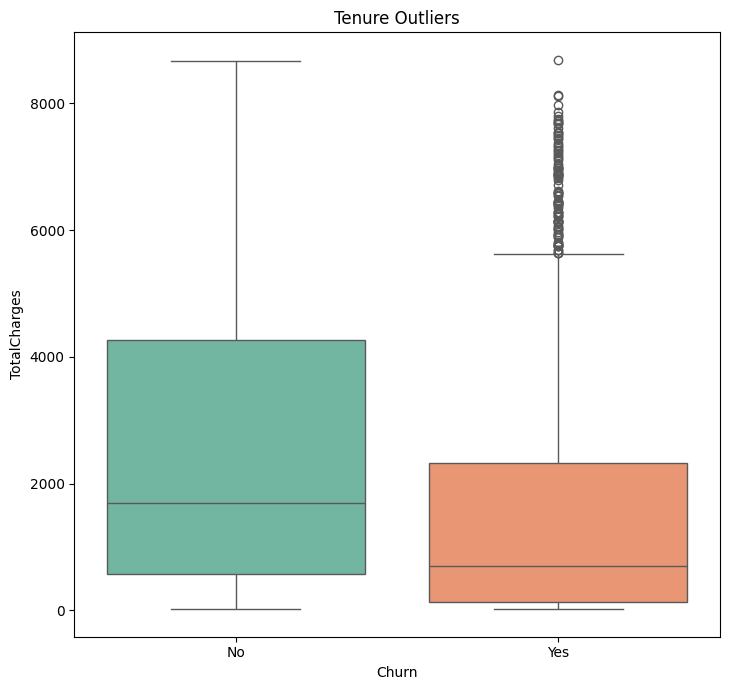

In [22]:
#  Outlier Analysis (using Boxplots)
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.title('Tenure Outliers')

plt.tight_layout()
plt.show()

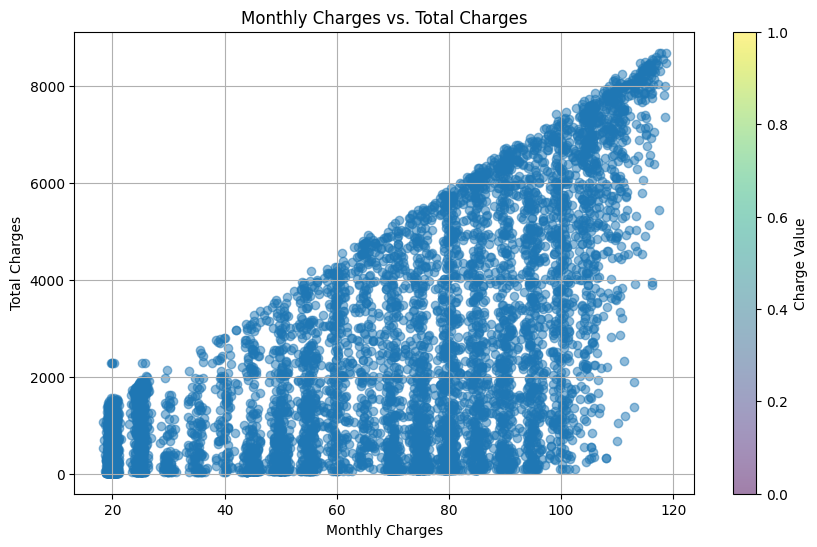

In [23]:
# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.colorbar(label='Charge Value')
plt.grid(True)
plt.show()



**This Section will disscuss**


* Missing Values Detection




**Catagorical Veriables Distribution Analysis**

provides a summary of categorical columns in the DataFrame.

It displays the value counts and the ratio of each category in the specified column.


In [24]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]
#Prints the number of rows (observations)
    print(f"Observations: {dataframe.shape[0]}")
#Prints the number of columns (variables)
    print(f"Variables: {dataframe.shape[1]}")
#Prints the number of categorical variables
    print(f'cat_cols: {len(cat_cols)}')
#Prints the number of numerical variables
    print(f'num_cols: {len(num_cols)}')
#Prints the number of cardinal categorical variables
    print(f'cat_but_car: {len(cat_but_car)}')
#Prints the number of numerical-looking categorical variables
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [25]:
#Detects different types of columns in a Pandas DataFrame
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)
#column that hold categorical data
cat_cols
#column that hold numerical data
num_cols
#column that appear categorical but have too many unique values
cat_but_car
#column that are stored as numbers but behave like categories
num_but_cat

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


['SeniorCitizen']

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
Distribution of gender


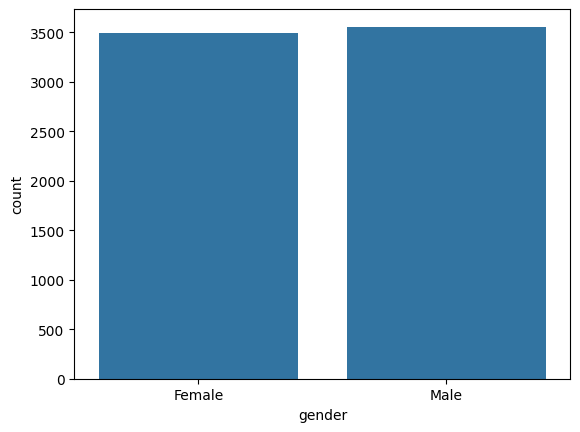

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
Distribution of Partner


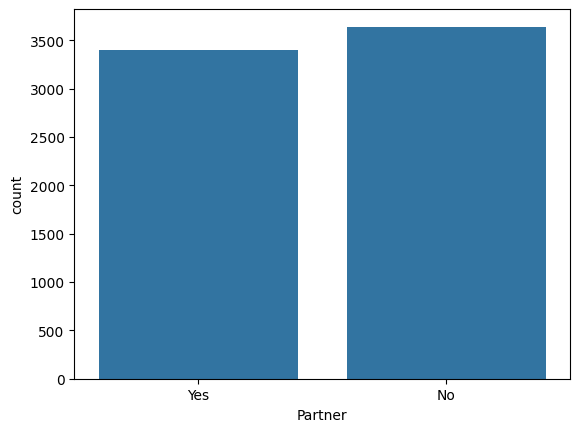

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
Distribution of Dependents


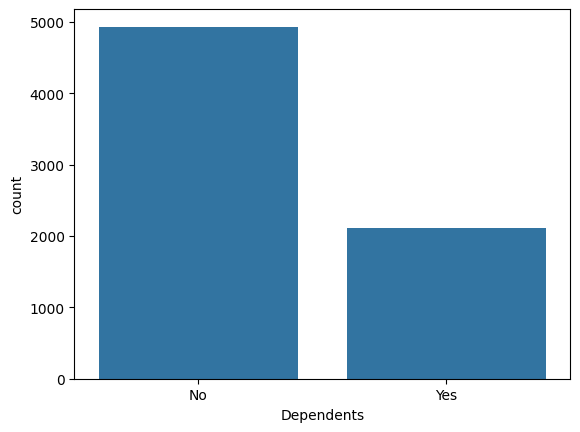

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
Distribution of PhoneService


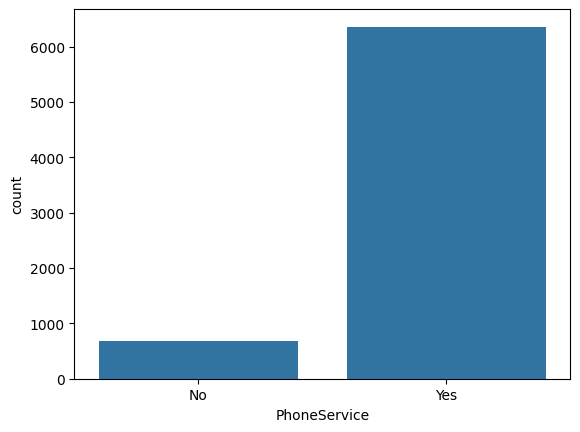

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
Distribution of MultipleLines


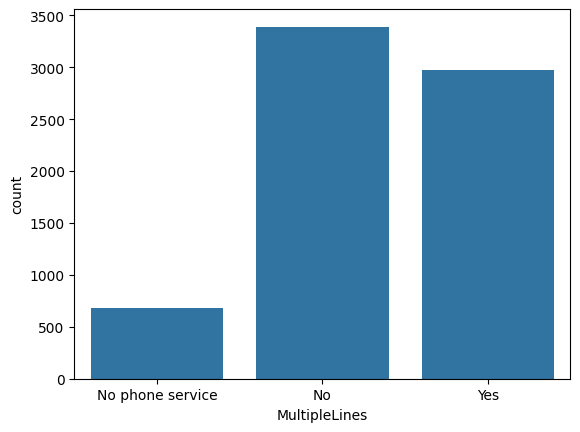

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
Distribution of InternetService


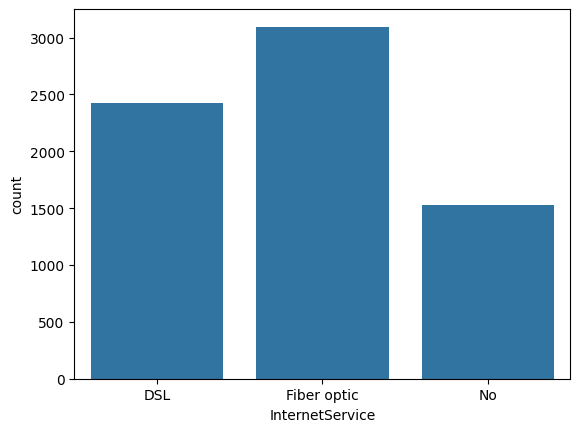

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
Distribution of OnlineSecurity


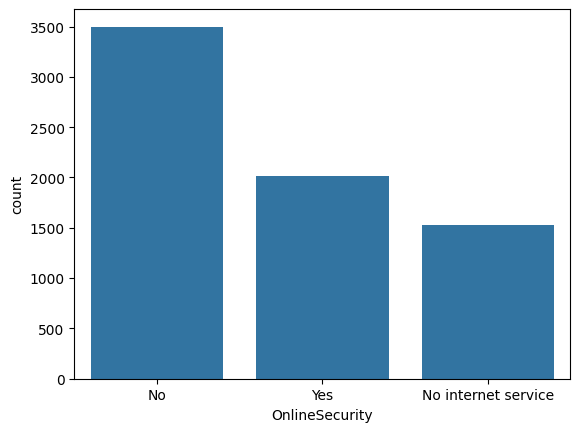

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
Distribution of OnlineBackup


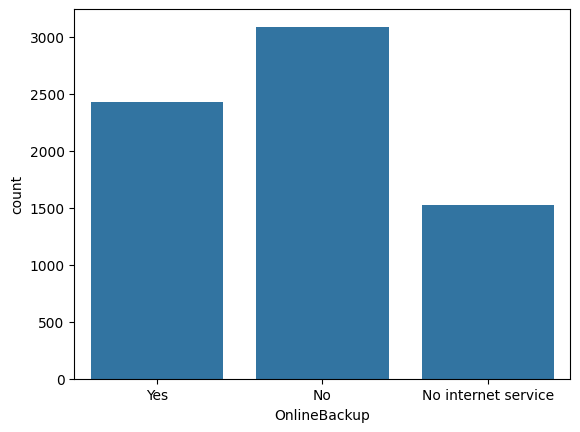

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
Distribution of DeviceProtection


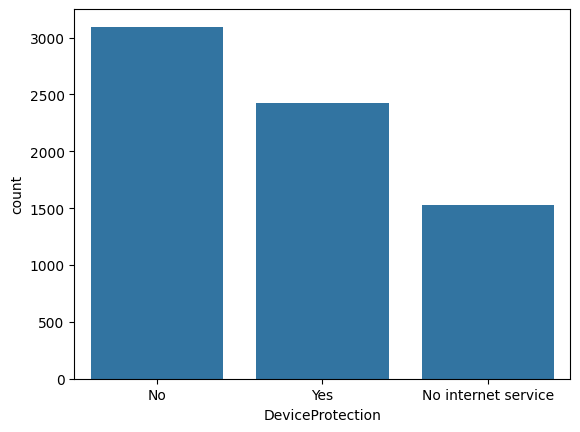

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
Distribution of TechSupport


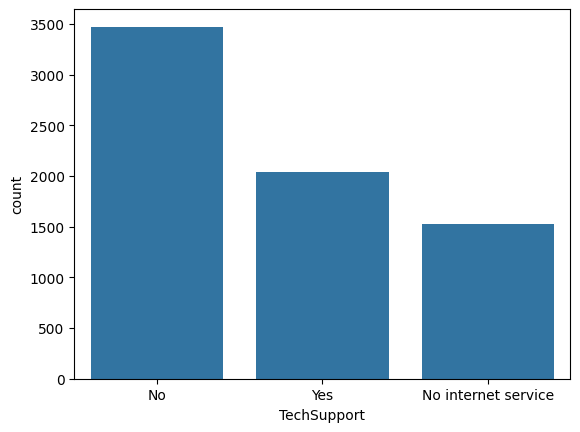

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
Distribution of StreamingTV


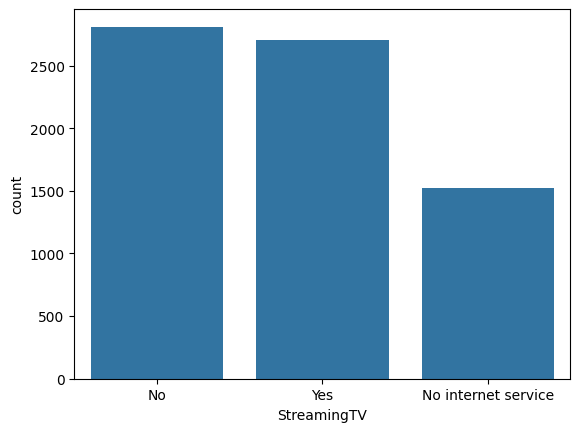

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
Distribution of StreamingMovies


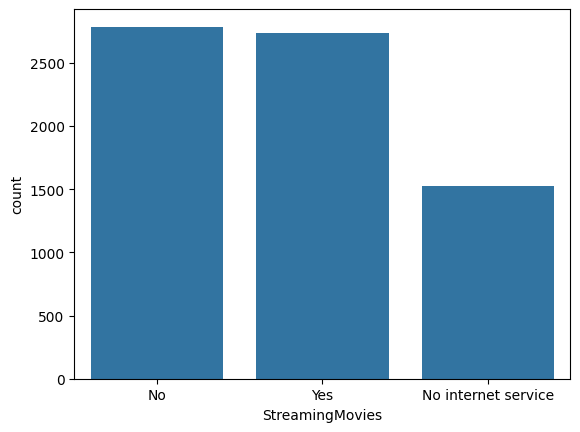

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
Distribution of Contract


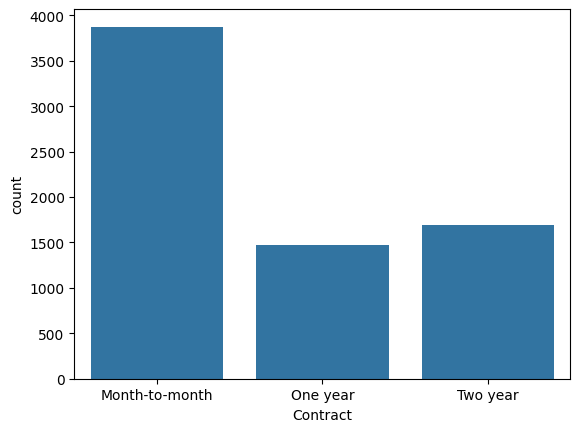

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
Distribution of PaperlessBilling


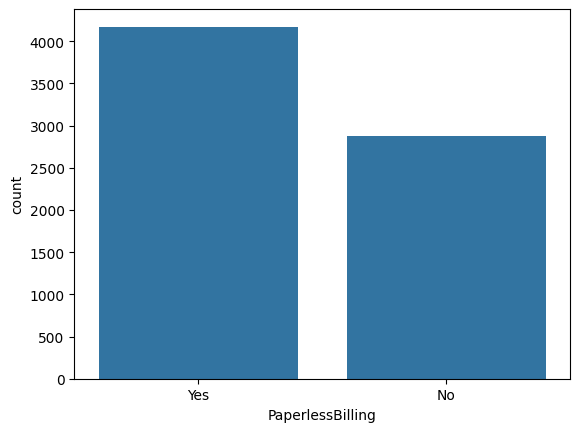

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
Distribution of PaymentMethod


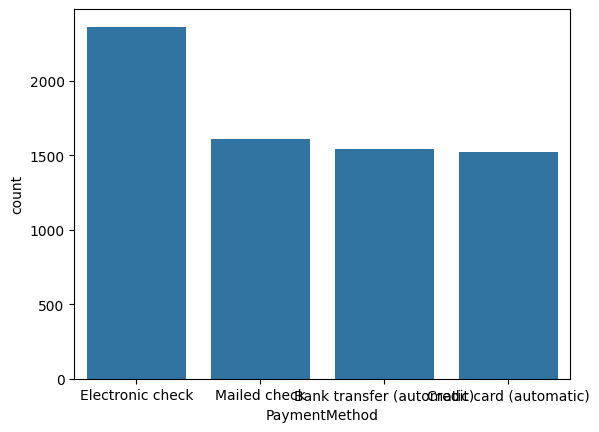

       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
Distribution of Churn


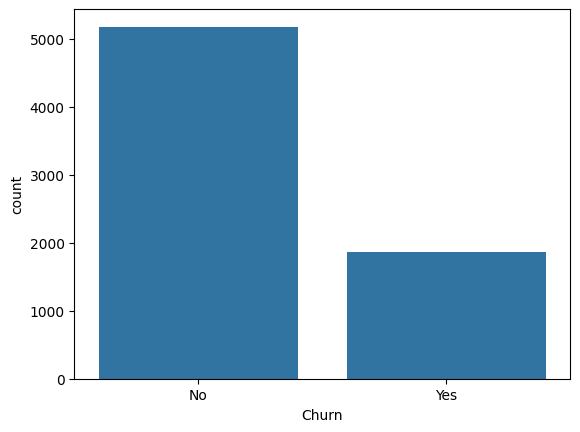

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
Distribution of SeniorCitizen


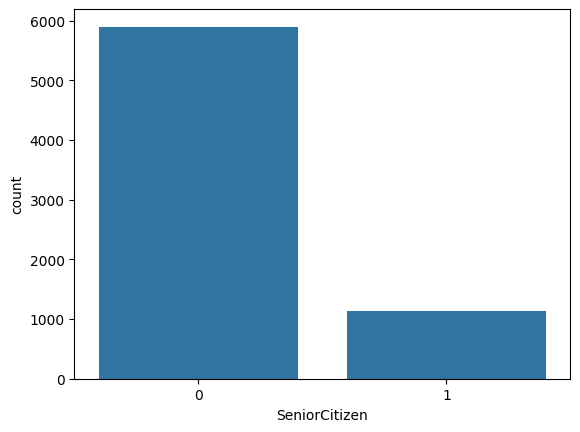

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"Distribution of {col_name}")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
for col in cat_cols:
    cat_summary(df, col, plot=True)

provides a **summary of numerical columns** in the DataFrame.

It prints descriptive statistics (like mean, min, max, and quantiles) for the specified numerical column.

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


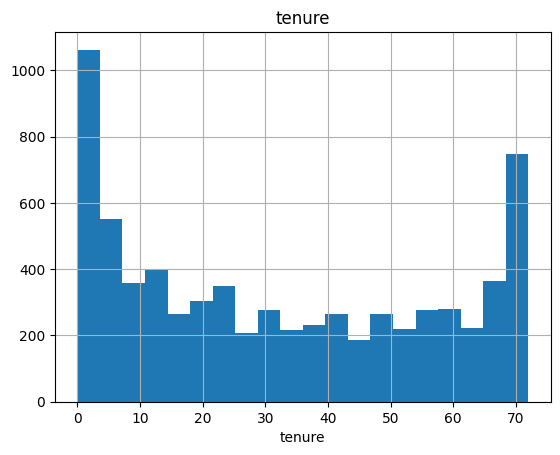

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


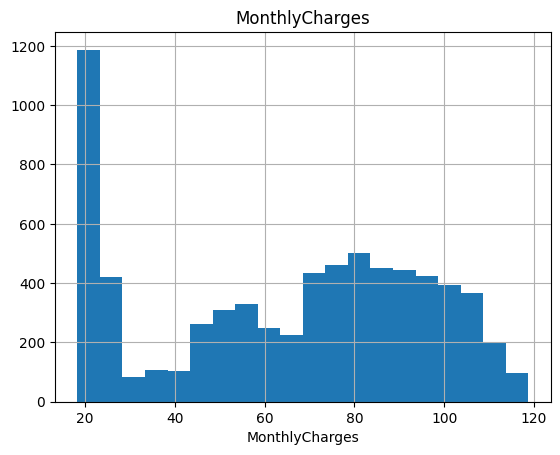

count   7043.000
mean    2283.300
std     2265.000
min       18.800
5%        49.650
10%       84.610
20%      267.370
30%      552.820
40%      947.380
50%     1400.550
60%     2065.520
70%     3132.750
80%     4471.440
90%     5973.690
95%     6921.025
99%     8039.256
max     8684.800
Name: TotalCharges, dtype: float64


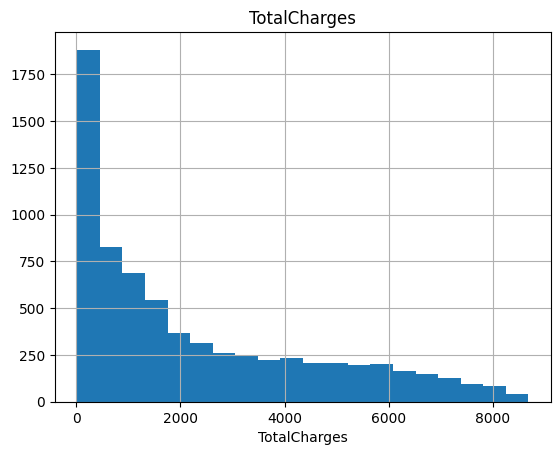

In [27]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
for col in num_cols:
    num_summary(df, col, plot=True)

**Handling Data Type Conversion**

In [28]:
# Changed the type of the TotalCharges variable.

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Changed the type of the SeniorCitizen variable.

df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

# Changed the representation of the Churn variable in the dataset from "Yes" and "No" to 1 and 0.

df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


**Classifying Variables as Numeric or Categorical**

* Returns the categorical, numeric and categorical veriables but cardinal variables in the data set.
* Categorical variables includes both categorical variables with numeric appearance

**Analysis of Numeric Variables by Target**
Analyzes the relationship between a numerical variable and a categorical target variable by calculating the mean of numerical columns for each category in the target column.

In [30]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("---------------------------------------------------------------")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979
---------------------------------------------------------------
       MonthlyCharges
Churn                
0              61.265
1              74.441
---------------------------------------------------------------
       TotalCharges
Churn              
0          2554.766
1          1531.796
---------------------------------------------------------------


**Analyzes the relationship between a categorical feature and a target variable by calculating:**

* Mean of the target variable for each category (useful for classification problems).
* Count of each category in the dataset.
* Percentage (ratio) of each category in the dataset.

In [31]:
print("Relationship between a Categorical Veriables and a Target Variable")
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}))
    print("---------------------------------------------------------------")
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

Relationship between a Categorical Veriables and a Target Variable
gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476
---------------------------------------------------------------
Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303
---------------------------------------------------------------
Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959
---------------------------------------------------------------
PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317
---------------------------------------------------------------
MultipleLines
                  TARGET_MEAN  Count

**Applies a logarithmic Transformation**
* Helps reduce skewness in data and make it more normally distributed
*  logarithmic transformation to the "Churn" column and plots its histogram to visualize the distribution.

In [32]:
#np.log1p(df["Churn"]).hist(bins=50)

#plt.title('Log Transformed Histogram of Churn', fontsize=14)
#plt.xlabel('Log(1 + Churn)', fontsize=12)
#plt.ylabel('Frequency', fontsize=12)

#plt.show(block=True)

**Dataset Correlation Analysis**

In [33]:
#Correlation of the Numarical Veriables
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.825
MonthlyCharges,0.248,1.000,0.650
TotalCharges,0.825,0.650,1.000


**Deal with missing values**

**Deuplicate Dataframe**
To save orignal dataframe and prform some modifaction in dataframe.

In [34]:
dfcopy = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

**One-Hot Encoding**

One-hot encoding is a technique used to convert categorical variables (e.g., "Gender", "Country") into a format that can be provided to machine learning algorithms, typically as binary columns (0 or 1)

In [35]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [36]:
dfcopy = one_hot_encoder(dfcopy, cat_cols)
dfcopy.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,34,56.950,1889.500,0,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,2,53.850,108.150,1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False
3,7795-CFOCW,45,42.300,1840.750,0,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,2,70.700,151.650,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False


**Standardization**

Applies Robust Scaling to the numerical columns

making the data more robust to outliers. This transformation is useful in situations where the dataset has extreme values or outliers that could skew

In [37]:
scaler = RobustScaler()
dfcopy[num_cols] = scaler.fit_transform(dfcopy[num_cols])
dfcopy.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
0,7590-VHVEG,-0.609,-0.745,-0.405,0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,0.109,-0.247,0.144,0,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,-0.587,-0.304,-0.382,1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False
3,7795-CFOCW,0.348,-0.516,0.130,0,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,-0.587,0.006,-0.369,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False


**Contructing Dependent Variable**

Process of separating the target variable

In [38]:
y = dfcopy["Churn"]
X = dfcopy.drop(["Churn",'customerID'], axis=1)

**Modeling**

Defining a list of different machine learning models that will likely be used for classification tasks

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [40]:
models = [('Logistic Regression', LogisticRegression(random_state=12345)),
          ('KNeighbors', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier(random_state=12345)),
          ('Random Forest', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345)),
          ("Naive Bayes", GaussianNB()),
          ("Neural Network", MLPClassifier(random_state=12345, max_iter=500, hidden_layer_sizes=(100,)))]

In [41]:
firstmodels_metrics = []

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [44]:


# Now, you can train and evaluate your models using the training data
for name, model in models:
    model.fit(X_train, y_train)  # Fit the model to the training data

    # Predict and evaluate using the test data
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    firstmodels_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"---------------------- {name} --------------------")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

---------------------- Logistic Regression --------------------
Accuracy: 0.8019872249822569
AUC: 0.7169762020647078
Recall: 0.5329815303430079
Precision: 0.6644736842105263
F1: 0.5915080527086384
---------------------- KNeighbors --------------------
Accuracy: 0.7530163236337828
AUC: 0.6784781105105412
Recall: 0.5171503957783641
Precision: 0.5429362880886427
F1: 0.5297297297297298
---------------------- Decision Tree --------------------
Accuracy: 0.7324343506032647
AUC: 0.6677357378896943
Recall: 0.5277044854881267
Precision: 0.5025125628140703
F1: 0.5148005148005148
---------------------- Random Forest --------------------
Accuracy: 0.7856635911994322
AUC: 0.6899684914312063
Recall: 0.48284960422163586
Precision: 0.6332179930795848
F1: 0.5479041916167665
---------------------- XGB --------------------
Accuracy: 0.7955997161107168
AUC: 0.7117734457053565
Recall: 0.5303430079155673
Precision: 0.6463022508038585
F1: 0.5826086956521739
[LightGBM] [Warning] Found whitespace in feature_na

**Model Comparison** of Metrics for Different Models Before Feature Engineering

Visualizes the results using a bar plot to compare the performance of different models

In [45]:
# Containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "Decision Tree", "RF", "XGB", "LightGBM", "CatBoost","Naive Bayes","Neural Network"],
    "Accuracy": [firstmodels_metrics[0]['Accuracy'], firstmodels_metrics[1]['Accuracy'],
                 firstmodels_metrics[2]['Accuracy'], firstmodels_metrics[3]['Accuracy'],
                 firstmodels_metrics[4]['Accuracy'], firstmodels_metrics[5]['Accuracy'],
                 firstmodels_metrics[6]['Accuracy'],firstmodels_metrics[7]['Accuracy'],
                 firstmodels_metrics[8]['Accuracy']],
    "AUC": [firstmodels_metrics[0]['AUC'], firstmodels_metrics[1]['AUC'],
            firstmodels_metrics[2]['AUC'], firstmodels_metrics[3]['AUC'],
            firstmodels_metrics[4]['AUC'], firstmodels_metrics[5]['AUC'],
            firstmodels_metrics[6]['AUC'],firstmodels_metrics[7]['AUC'],
            firstmodels_metrics[8]['AUC']],
    "Recall": [firstmodels_metrics[0]['Recall'], firstmodels_metrics[1]['Recall'],
               firstmodels_metrics[2]['Recall'], firstmodels_metrics[3]['Recall'],
               firstmodels_metrics[4]['Recall'], firstmodels_metrics[5]['Recall'],
               firstmodels_metrics[6]['Recall'],firstmodels_metrics[7]['Recall'],
               firstmodels_metrics[8]['Recall']],
    "Precision": [firstmodels_metrics[0]['Precision'], firstmodels_metrics[1]['Precision'],
                  firstmodels_metrics[2]['Precision'], firstmodels_metrics[3]['Precision'],
                  firstmodels_metrics[4]['Precision'], firstmodels_metrics[5]['Precision'],
                  firstmodels_metrics[6]['Precision'],firstmodels_metrics[7]['Precision'],
                  firstmodels_metrics[8]['Precision']],
    "F1": [firstmodels_metrics[0]['F1'], firstmodels_metrics[1]['F1'],
           firstmodels_metrics[2]['F1'], firstmodels_metrics[3]['F1'],
           firstmodels_metrics[4]['F1'], firstmodels_metrics[5]['F1'],
           firstmodels_metrics[6]['F1'],firstmodels_metrics[7]['F1'],
           firstmodels_metrics[8]['F1']],
}
# Creating a DataFrame from the updated metrics
sresults_df = pd.DataFrame(metrics)
# Sorting the DataFrame by accuracy in descending order
sresults_df = sresults_df.sort_values(by="Accuracy", ascending=False)

sresults_df


,Model,Accuracy,AUC,Recall,Precision,F1
0,LR,0.802,0.717,0.533,0.664,0.592
5,LightGBM,0.798,0.710,0.520,0.659,0.581
4,XGB,0.796,0.712,0.530,0.646,0.583
6,CatBoost,0.795,0.704,0.507,0.653,0.571
3,RF,0.786,0.690,0.483,0.633,0.548
8,Neural Network,0.774,0.693,0.517,0.590,0.551
1,KNN,0.753,0.678,0.517,0.543,0.530
2,Decision Tree,0.732,0.668,0.528,0.503,0.515
7,Naive Bayes,0.690,0.735,0.834,0.458,0.591


In [46]:
# Creating the graph
fig = go.Figure()
# Colors for the metrics
colors = ["#FF6347", "#20B2AA", "#FFD700", "#8A2BE2", "#FF1493"]
# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=sresults_df["Model"],
        y=sresults_df[metric],
        marker_color=color,
        name=metric,
        text=sresults_df[metric],
        textposition='auto'
    ))
# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)
# Displaying the graph
fig.show(block=True)

**Feature Importance** With Respect to Model Classifaction

In [47]:
models = [RandomForestClassifier(),
              XGBClassifier(),
              LGBMClassifier(),
              CatBoostClassifier(verbose=False, random_state=12345)
              ]

In [48]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

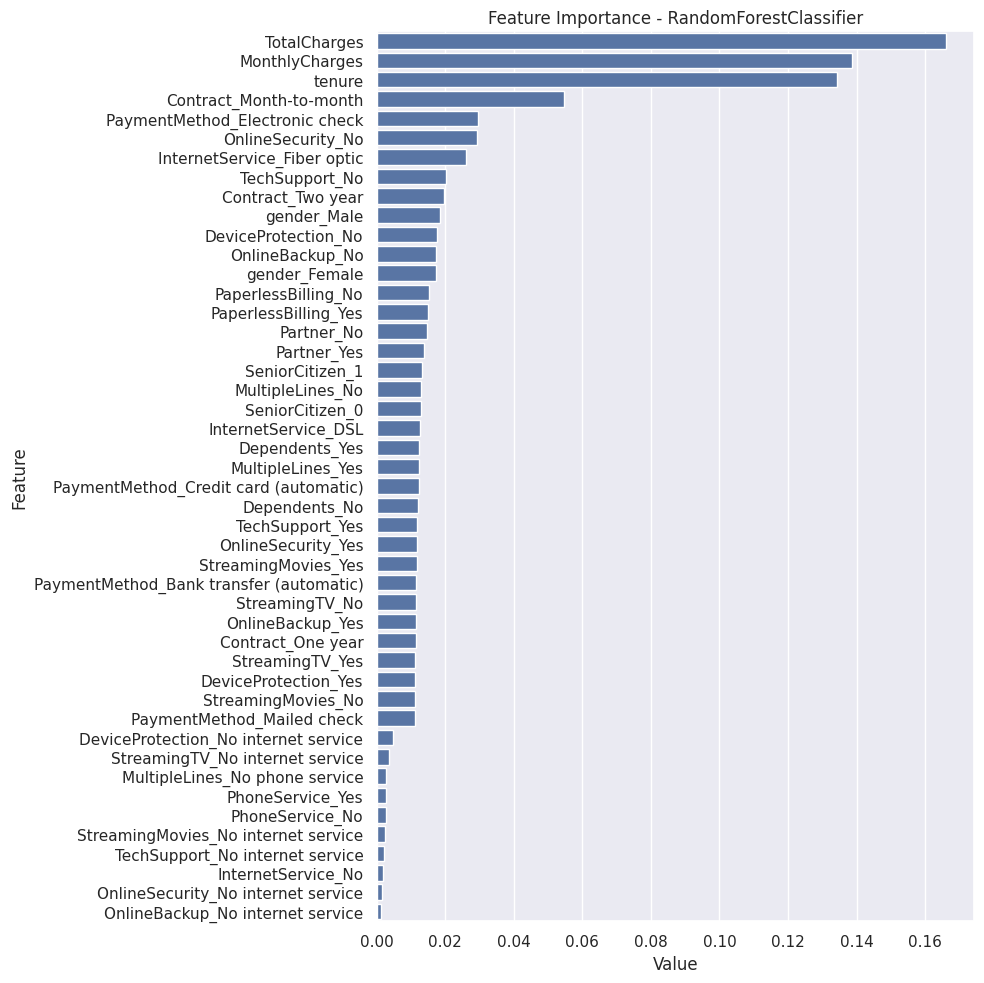

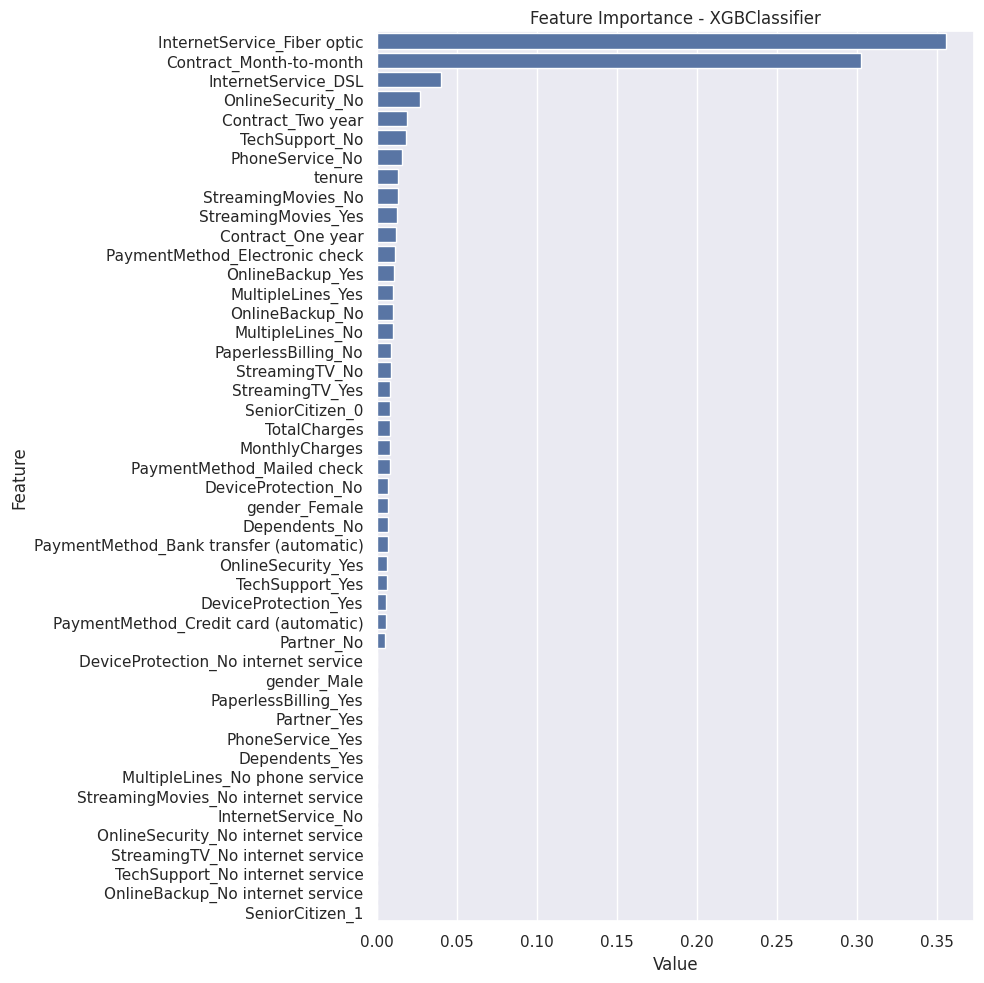

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243


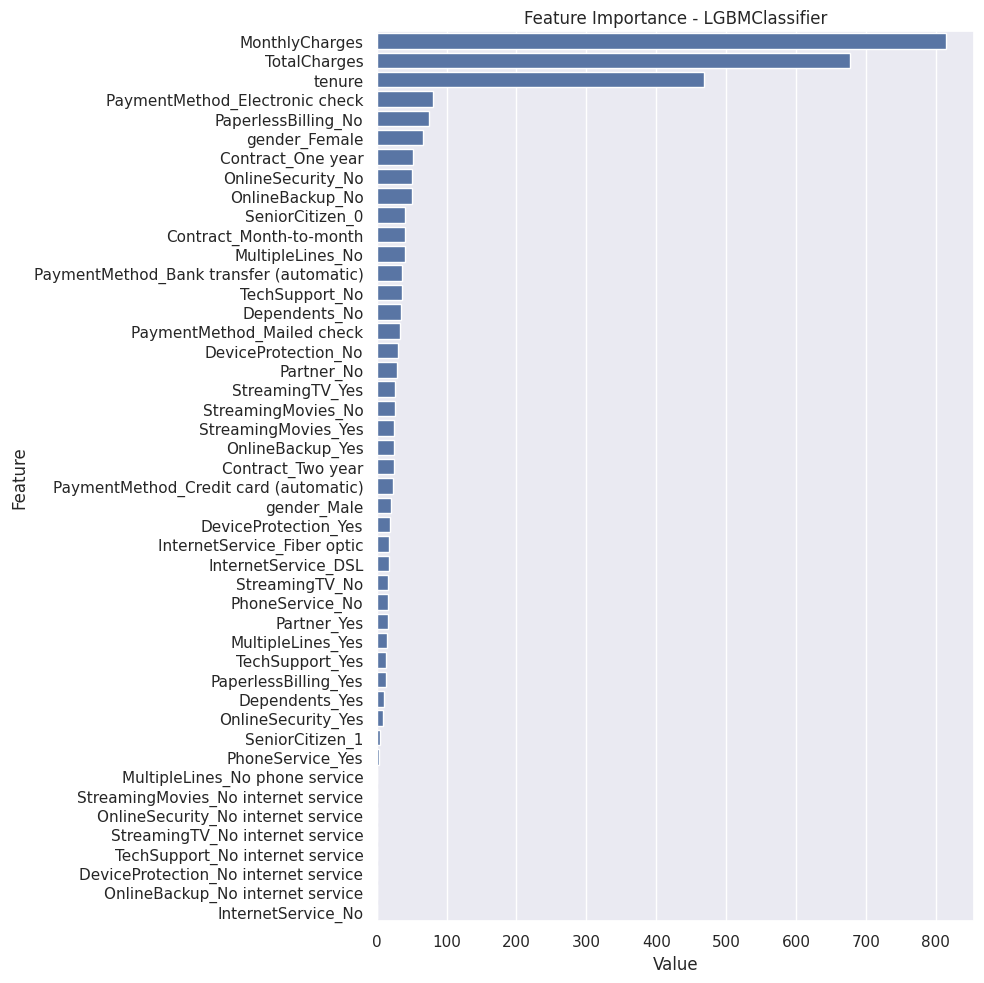

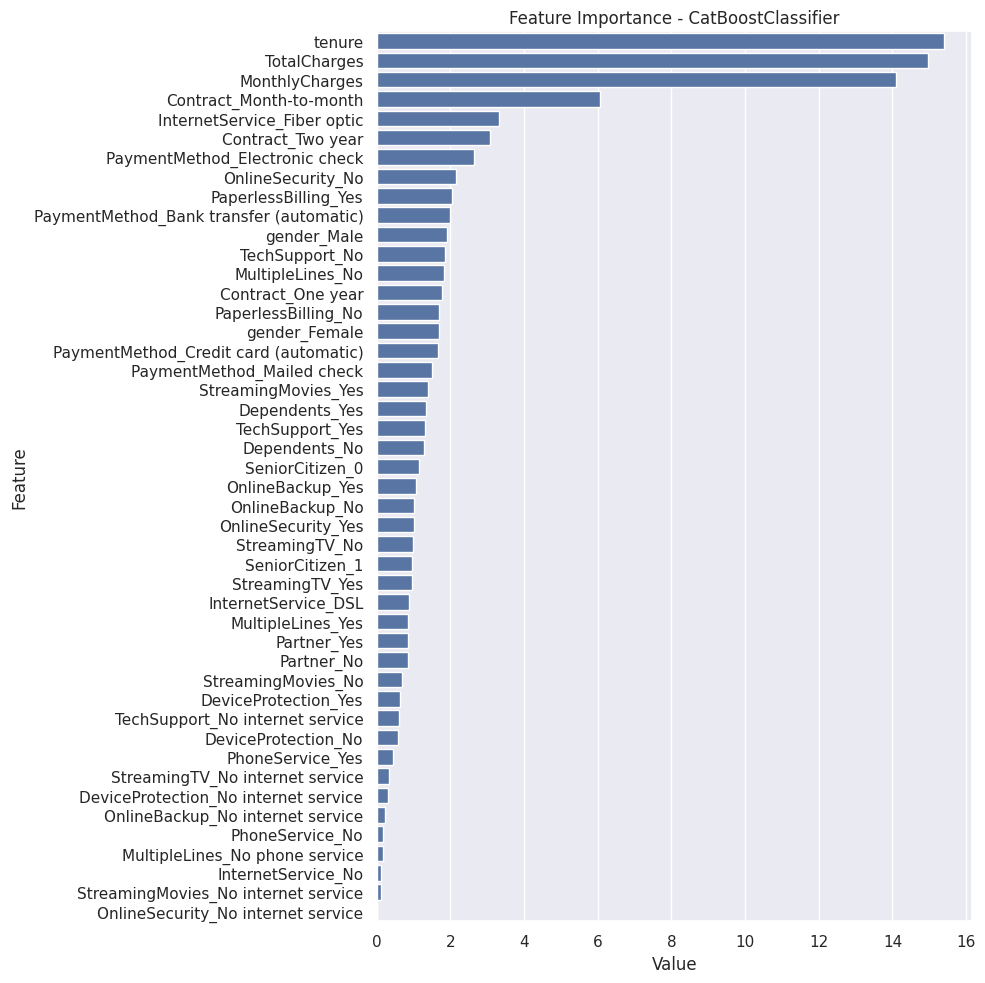

In [49]:
for model in models:
    model.fit(X, y)
    plot_importance(model, X)

**Feature selection **

In [50]:
df.shape

(7043, 21)

**ENCODING**

Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
Note Categorical variables include categorical variables with numeric appearance.

In [51]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)
print("-----------------------------------------")
cat_cols

num_cols

cat_but_car

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1
-----------------------------------------


['customerID']

**Label Encoding**

performing Label Encoding on binary categorical columns in the dataframe. Label Encoding is a technique used to convert categorical data into numerical form

**One-Hot Encoding**

In [52]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [53]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, cat_cols)
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.850,29.850,0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.950,1889.500,0,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.850,108.150,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.300,1840.750,0,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.700,151.650,1,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


In [54]:
models1 = [('Logistic Regression', LogisticRegression(random_state=12345)),
          ('KNeighbors', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier(random_state=12345)),
          ('Random Forest', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345)),
          ("Naive Bayes", GaussianNB()),
          ("Neural Network", MLPClassifier(random_state=12345, max_iter=500, hidden_layer_sizes=(100,)))]

In [55]:
last_models_metrics = []

In [56]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

In [57]:
dfcopy = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [58]:
y1 = df["Churn"]
X1 = df.drop(["Churn",'customerID'], axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=12345)

In [60]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)




feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features


X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [61]:
selected_features

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'Partner_No',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'TechSupport_No',
 'Contract_Month-to-month',
 'PaperlessBilling_No',
 'PaymentMethod_Electronic check']

**Standardization Process**



In [62]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

***Constructing Model After Feature Engeenring ***

In [63]:
#  train and evaluate your models using the training data
for name, model in models1:
    model.fit(X_train, y_train)  # Fit the model to the training data

    # Predict and evaluate using the test data
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"---------------------- {name} --------------------")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

---------------------- Logistic Regression --------------------
Accuracy: 0.8026969481902059
AUC: 0.708289571432231
Recall: 0.503957783641161
Precision: 0.6797153024911032
F1: 0.5787878787878787
---------------------- KNeighbors --------------------
Accuracy: 0.7863733144073811
AUC: 0.6987921715295745
Recall: 0.5092348284960422
Precision: 0.6266233766233766
F1: 0.5618631732168851
---------------------- Decision Tree --------------------
Accuracy: 0.7203690560681334
AUC: 0.6211273919614724
Recall: 0.40633245382585753
Precision: 0.47678018575851394
F1: 0.43874643874643876
---------------------- Random Forest --------------------
Accuracy: 0.7885024840312278
AUC: 0.6752337525936931
Recall: 0.43007915567282323
Precision: 0.6653061224489796
F1: 0.5224358974358975
---------------------- XGB --------------------
Accuracy: 0.7750177430801988
AUC: 0.6735148705074673
Recall: 0.45382585751978893
Precision: 0.6099290780141844
F1: 0.5204236006051437
[LightGBM] [Info] Number of positive: 1490, numbe

**Metrics Comparison After after Feature Engineering**

In [64]:
metrics1 = {
    "Model": ["LR", "KNN", "Decision Tree", "RF", "XGB", "LightGBM", "CatBoost","Naive Bayes","Neural Network"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy'], last_models_metrics[7]['Accuracy'],
                 last_models_metrics[8]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC'], last_models_metrics[7]['AUC'],
            last_models_metrics[8]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall'], last_models_metrics[7]['Recall'],
               last_models_metrics[8]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision'], last_models_metrics[7]['Precision'],
                  last_models_metrics[8]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1'], last_models_metrics[7]['F1'],
           last_models_metrics[8]['F1']],
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics1)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy,AUC,Recall,Precision,F1
8,Neural Network,0.806,0.701,0.475,0.706,0.568
0,LR,0.803,0.708,0.504,0.680,0.579
6,CatBoost,0.799,0.687,0.443,0.700,0.543
5,LightGBM,0.794,0.684,0.446,0.679,0.538
3,RF,0.789,0.675,0.430,0.665,0.522
1,KNN,0.786,0.699,0.509,0.627,0.562
4,XGB,0.775,0.674,0.454,0.610,0.520
7,Naive Bayes,0.767,0.765,0.763,0.547,0.637
2,Decision Tree,0.720,0.621,0.406,0.477,0.439


In [65]:
# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["#FF6347", "#20B2AA", "#FFD700", "#8A2BE2", "#FF1493"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Models Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

**Imprtant Features**

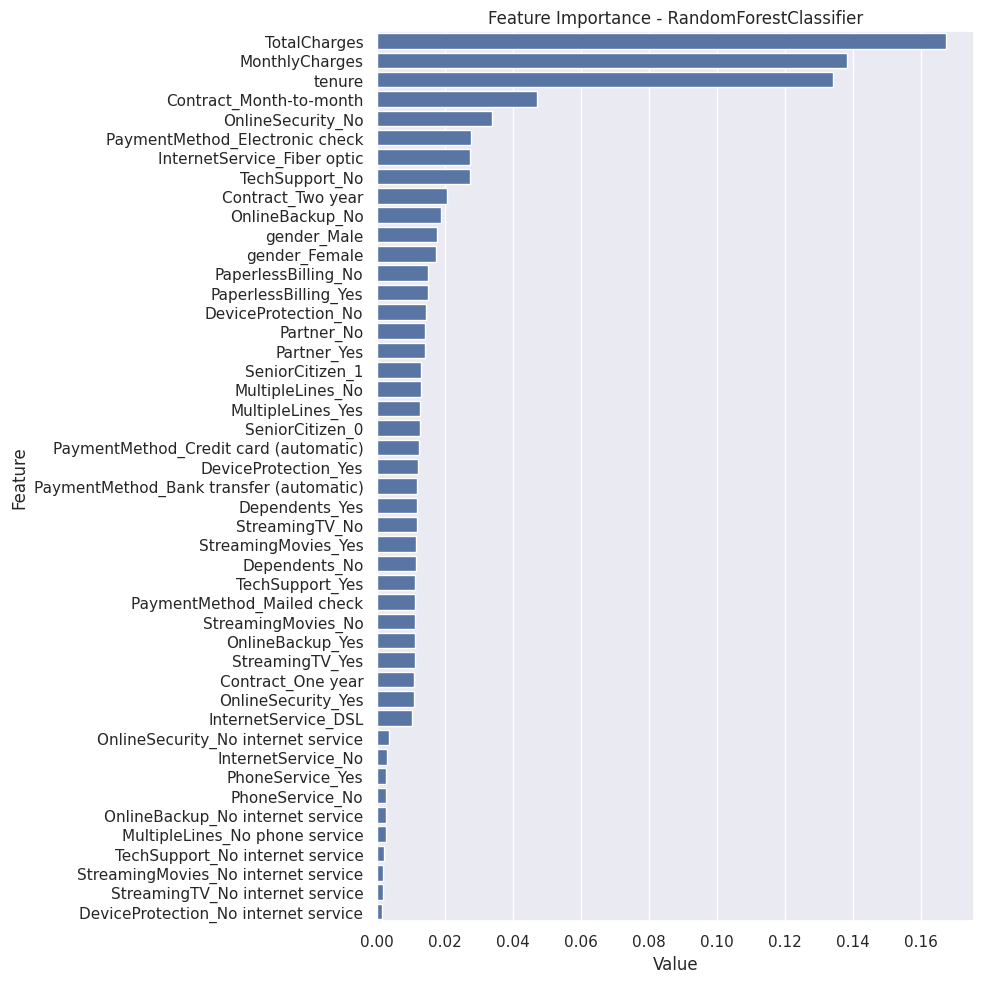

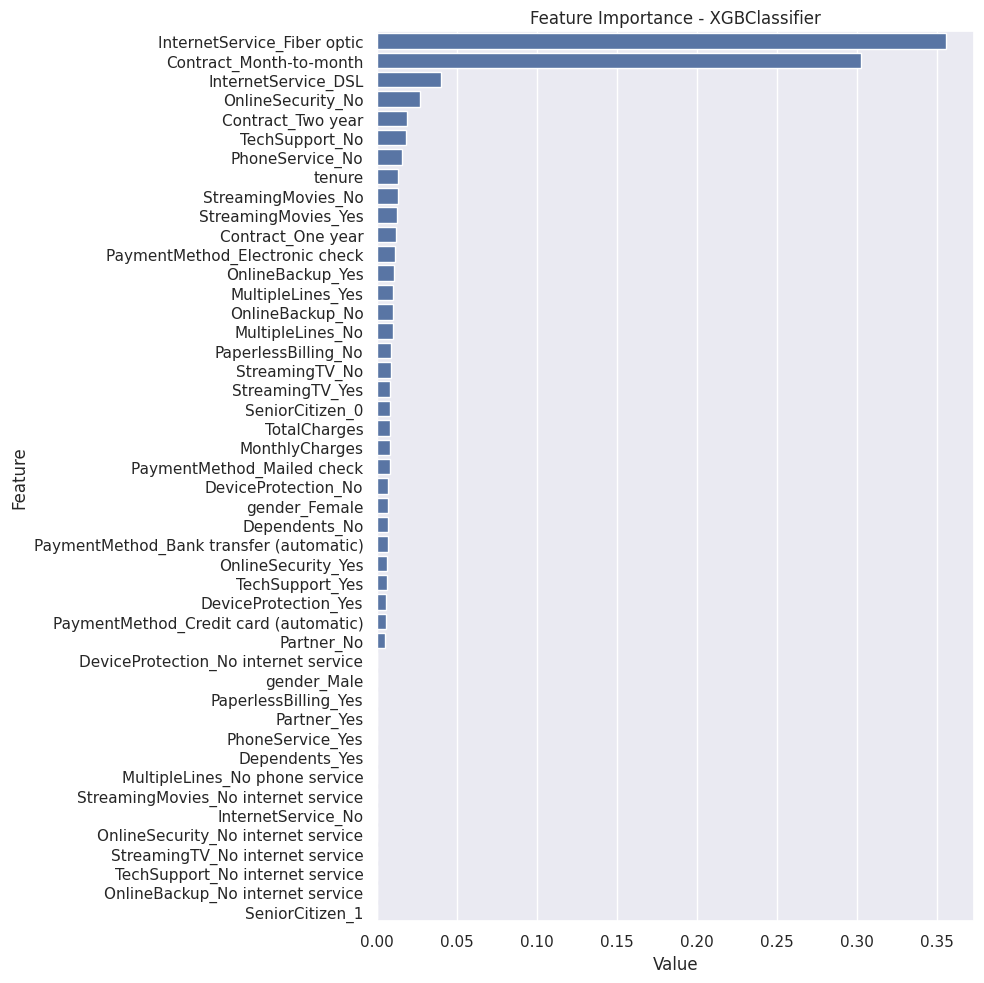

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243


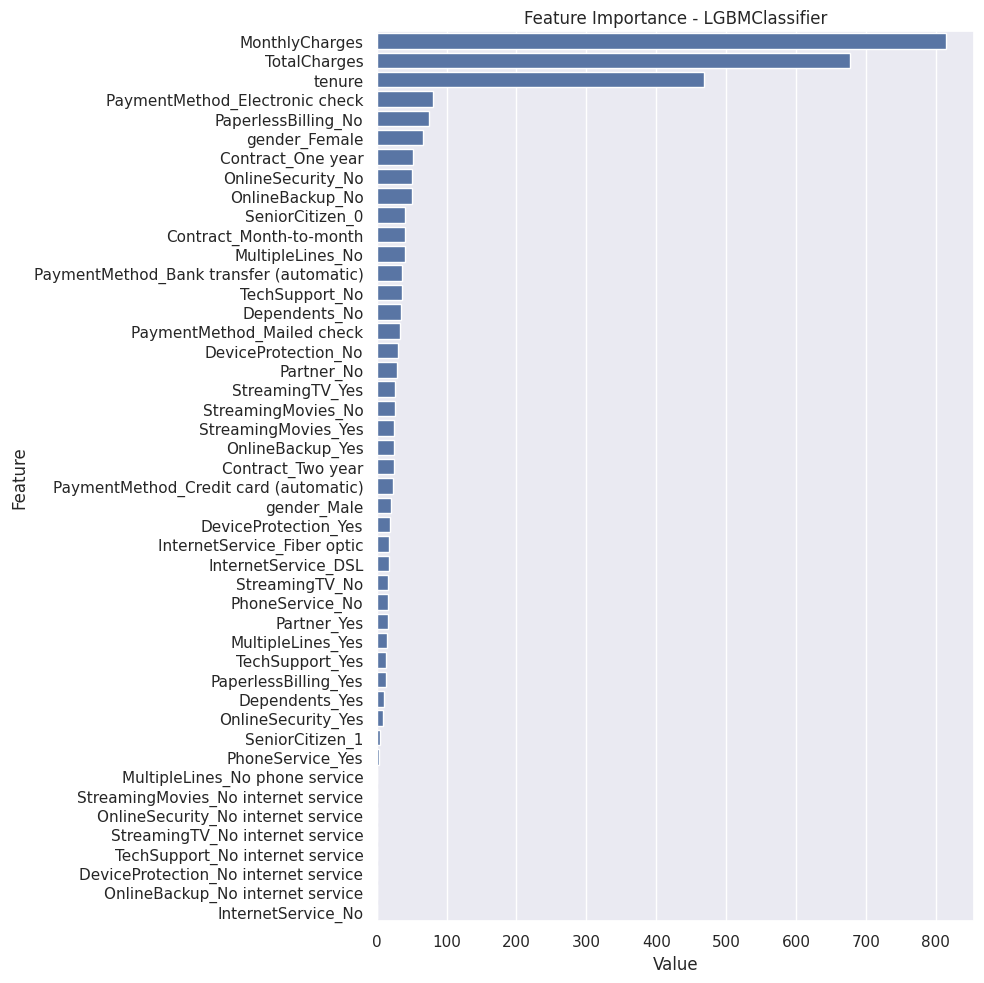

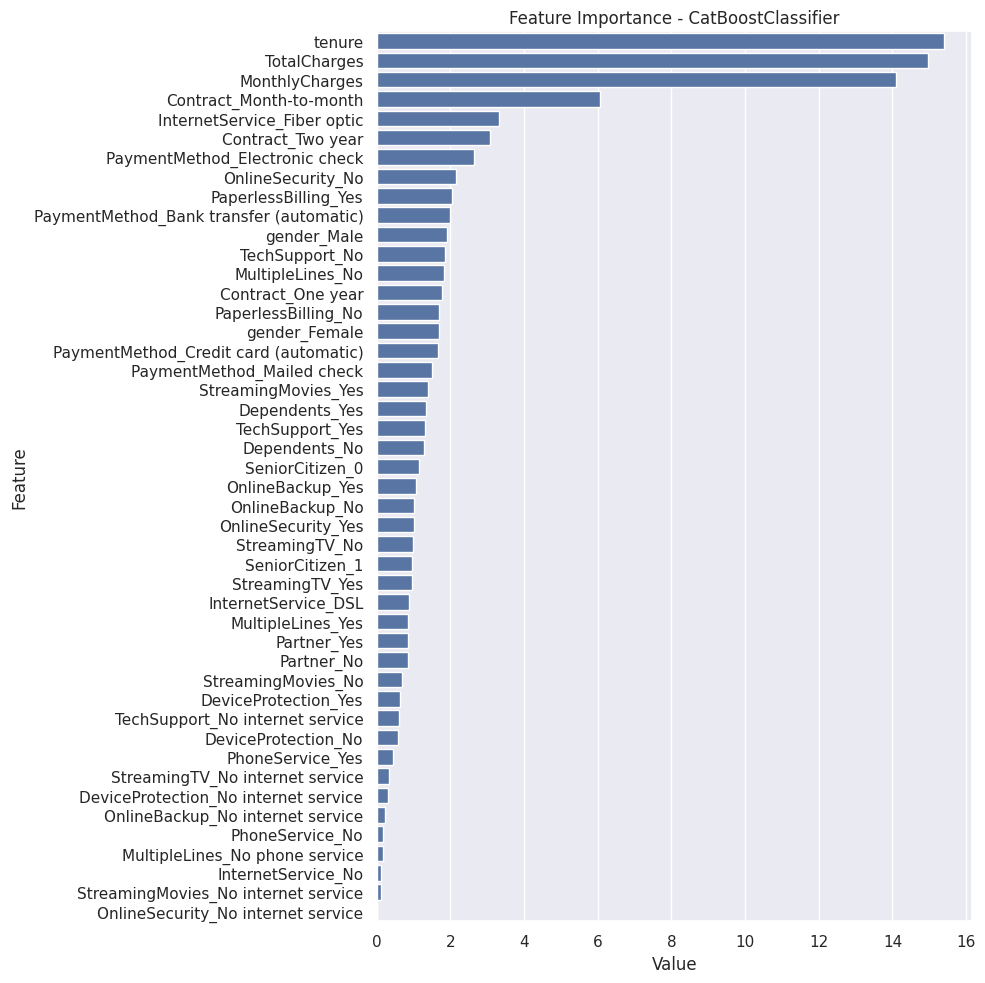

In [66]:
models1 = [RandomForestClassifier(),
              XGBClassifier(),
              LGBMClassifier(),
              CatBoostClassifier(verbose=False, random_state=12345)
              ]
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')
for model in models:
    model.fit(X, y)
    plot_importance(model, X)

**Comparison After Feature Engineering**

 Compares the metrics of two sets of models and visualizes the changes.

    Args:
        first_models_metrics (list of dict): Metrics of the first set of models.
        last_models_metrics (list of dict): Metrics of the second set of models.


In [67]:
# prompt: write code that comparison base model and the last model metrics change base model key and last model  name to first model and last model and also use different color to first model and last model

import pandas as pd
import plotly.graph_objects as go

def compare_models(first_models_metrics, last_models_metrics):

    # Create DataFrames
    first_df = pd.DataFrame(first_models_metrics)
    last_df = pd.DataFrame(last_models_metrics)

    #Rename columns for clarity in the plot
    first_df = first_df.rename(columns={"Model": "First Model"})
    last_df = last_df.rename(columns={"Model": "Last Model"})

    # Merge DataFrames
    merged_df = pd.merge(first_df, last_df, left_index=True, right_index=True)

    # Create Plotly figure
    fig = go.Figure()

    # Define colors
    first_model_color = '#1f77b4' #blue
    last_model_color = '#ff7f0e' #orange


    # Add traces for each metric
    for metric in ["Accuracy", "AUC", "Recall", "Precision", "F1"]:
        fig.add_trace(go.Bar(
            x=merged_df["First Model"],
            y=merged_df[metric + "_x"],
            name=f"First Model - {metric}",
            marker_color=first_model_color,
            text=merged_df[metric + "_x"],
            textposition="auto"
        ))

        fig.add_trace(go.Bar(
            x=merged_df["Last Model"],
            y=merged_df[metric + "_y"],
            name=f"Last Model - {metric}",
            marker_color=last_model_color,
            text=merged_df[metric + "_y"],
            textposition="auto"
        ))

    # Update layout
    fig.update_layout(
        title="Comparison of Model Metrics",
        xaxis_title="Model",
        yaxis_title="Metric Score",
        barmode='group' #Group the bars for better comparison
    )

    fig.show()

# Example usage (replace with your actual data):
# Assuming firstmodels_metrics and last_models_metrics are defined as in your original code
compare_models(firstmodels_metrics, last_models_metrics)


In [68]:
# Create DataFrames for easier comparison
base_df = pd.DataFrame(firstmodels_metrics).set_index('Model')
last_df = pd.DataFrame(last_models_metrics).set_index('Model')

# Calculate the difference in metrics
difference_df = last_df - base_df

# Combine the dataframes
comparison_df = pd.concat([base_df, last_df, difference_df], axis=1, keys=['Base Model', 'Last Model', 'Difference'])

# Add a column to indicate increase or decrease
comparison_df['Difference']['Increase/Decrease'] = comparison_df['Difference'].apply(lambda row: 'Increase' if all(val > 0 for val in row[:-1]) else ('Decrease' if all(val < 0 for val in row[:-1]) else 'Mixed'), axis=1)

# Display the table
comparison_df

Base Model                              Last Model                              Difference                               
                      Accuracy   AUC Recall Precision    F1   Accuracy   AUC Recall Precision    F1   Accuracy    AUC Recall Precision     F1
Model                                                                                                                                        
Logistic Regression      0.802 0.717  0.533     0.664 0.592      0.803 0.708  0.504     0.680 0.579      0.001 -0.009 -0.029     0.015 -0.013
KNeighbors               0.753 0.678  0.517     0.543 0.530      0.786 0.699  0.509     0.627 0.562      0.033  0.020 -0.008     0.084  0.032
Decision Tree            0.732 0.668  0.528     0.503 0.515      0.720 0.621  0.406     0.477 0.439     -0.012 -0.047 -0.121    -0.026 -0.076
Random Forest            0.786 0.690  0.483     0.633 0.548      0.789 0.675  0.430     0.665 0.522      0.003 -0.015 -0.053     0.032 -0.025
XGB                      0.796 0.712  0.530     0.646 0.583      0.775 0.674  0.454     0.610 0.520     -0.021 -0.038 -0.077    -0.036 -0.062
LightGBM                 0.798 0.710  0.520     0.659 0.581      0.794 0.684  0.446     0.679 0.538     -0.004 -0.026 -0.074     0.020 -0.043
CatBoost                 0.795 0.704  0.507     0.653 0.571      0.799 0.687  0.443     0.700 0.543      0.004 -0.017 -0.063     0.047 -0.028
Naive Bayes              0.690 0.735  0.834     0.458 0.591      0.767 0.765  0.763     0.547 0.637      0.077  0.030 -0.071     0.089  0.046
Neural Network           0.774 0.693  0.517     0.590 0.551      0.806 0.701  0.475     0.706 0.568      0.032  0.009 -0.042     0.116  0.016

In [69]:

firstmodelmetrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost", "Naive Bayes", "Neural Network"],
    "Accuracy": [firstmodels_metrics[0]['Accuracy'], firstmodels_metrics[1]['Accuracy'],
                 firstmodels_metrics[2]['Accuracy'], firstmodels_metrics[3]['Accuracy'],
                 firstmodels_metrics[4]['Accuracy'], firstmodels_metrics[5]['Accuracy'],
                 firstmodels_metrics[6]['Accuracy'], firstmodels_metrics[7]['Accuracy'], firstmodels_metrics[8]['Accuracy']],
    "AUC": [firstmodels_metrics[0]['AUC'], firstmodels_metrics[1]['AUC'],
            firstmodels_metrics[2]['AUC'], firstmodels_metrics[3]['AUC'],
            firstmodels_metrics[4]['AUC'], firstmodels_metrics[5]['AUC'],
            firstmodels_metrics[6]['AUC'], firstmodels_metrics[7]['AUC'], firstmodels_metrics[8]['AUC']],
    "Recall": [firstmodels_metrics[0]['Recall'], firstmodels_metrics[1]['Recall'],
               firstmodels_metrics[2]['Recall'], firstmodels_metrics[3]['Recall'],
               firstmodels_metrics[4]['Recall'], firstmodels_metrics[5]['Recall'],
               firstmodels_metrics[6]['Recall'], firstmodels_metrics[7]['Recall'], firstmodels_metrics[8]['Recall']],
    "Precision": [firstmodels_metrics[0]['Precision'], firstmodels_metrics[1]['Precision'],
                  firstmodels_metrics[2]['Precision'], firstmodels_metrics[3]['Precision'],
                  firstmodels_metrics[4]['Precision'], firstmodels_metrics[5]['Precision'],
                  firstmodels_metrics[6]['Precision'], firstmodels_metrics[7]['Precision'], firstmodels_metrics[8]['Precision']],
    "F1": [firstmodels_metrics[0]['F1'], firstmodels_metrics[1]['F1'],
           firstmodels_metrics[2]['F1'], firstmodels_metrics[3]['F1'],
           firstmodels_metrics[4]['F1'], firstmodels_metrics[5]['F1'],
           firstmodels_metrics[6]['F1'], firstmodels_metrics[7]['F1'], firstmodels_metrics[8]['F1']]
}

# Adding new models (e.g., SVM and LR2) to the last metrics
last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost", "SVM", "LR2"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy'], last_models_metrics[7]['Accuracy'], last_models_metrics[8]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC'], last_models_metrics[7]['AUC'], last_models_metrics[8]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall'], last_models_metrics[7]['Recall'], last_models_metrics[8]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision'], last_models_metrics[7]['Precision'], last_models_metrics[8]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1'], last_models_metrics[7]['F1'], last_models_metrics[8]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(firstmodelmetrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)


Model Evaluation with SMOTE Blanc

In [70]:
yb1 = df["Churn"]
Xb1 = df.drop(["Churn",'customerID'], axis=1)

In [71]:
models2 = [('Logistic Regression', LogisticRegression(random_state=12345)),
          ('KNeighbors', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier(random_state=12345)),
          ('Random Forest', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345)),
          ("Naive Bayes", GaussianNB()),
          ("Neural Network", MLPClassifier(random_state=12345, max_iter=500, hidden_layer_sizes=(100,)))]

In [72]:
blanced_models_metrics=[]

In [73]:
X_trainb, X_test, y_trainb, y_test = train_test_split(Xb1, yb1, test_size=0.2, random_state=12345)

In [74]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=12)
rfe = rfe.fit(X_trainb, y_trainb)




feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_trainb.columns)]
bselected_features = [v for i, v in feature_map if i==True]

bselected_features


X_trainb = X_trainb[bselected_features]
X_test = X_test[bselected_features]

In [75]:
scaler = RobustScaler()
X_trainb = scaler.fit_transform(X_trainb)
X_test = scaler.fit_transform(X_test)

In [95]:
blanced_models_metrics=[]

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
#categorical_columns = X_trainb.columns

# Apply SMOTE to the training set to balance the classes
#smote = SMOTE(random_state=12345)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_trainb, y_trainb)

smote = SMOTE(random_state=12345)
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainb, y_trainb)

for name, model in models2:
    model.fit(X_train_resampled, y_train_resampled)  # Fit the model to the resampled training data

    # Predict and evaluate using the test data
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)



    blanced_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"---------------------- {name} --------------------")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

---------------------- Logistic Regression --------------------
Accuracy: 0.759403832505323
AUC: 0.7678971232420524
Recall: 0.7862796833773087
Precision: 0.5359712230215827
F1: 0.6374331550802139
---------------------- KNeighbors --------------------
Accuracy: 0.7395315826827538
AUC: 0.7317916335783999
Recall: 0.7150395778364116
Precision: 0.5113207547169811
F1: 0.5962596259625963
---------------------- Decision Tree --------------------
Accuracy: 0.6976579134137686
AUC: 0.6489522760458026
Recall: 0.5435356200527705
Precision: 0.44880174291938996
F1: 0.4916467780429594
---------------------- Random Forest --------------------
Accuracy: 0.7750177430801988
AUC: 0.7252119783794861
Recall: 0.6174142480211082
Precision: 0.5763546798029556
F1: 0.5961783439490446
---------------------- XGB --------------------
Accuracy: 0.7324343506032647
AUC: 0.7244357916848119
Recall: 0.7071240105540897
Precision: 0.50187265917603
F1: 0.5870755750273823
[LightGBM] [Info] Number of positive: 4144, number of 

In [105]:
# Create a DataFrame from the blanced_models_metrics list
balanced_results_df = pd.DataFrame(blanced_models_metrics)

balanced_results_df = balanced_results_df.sort_values(by="Accuracy", ascending=False)
# Display the DataFrame as a table
balanced_results_df

,Model,Accuracy,AUC,Recall,Precision,F1
3,Random Forest,0.775,0.725,0.617,0.576,0.596
0,Logistic Regression,0.759,0.768,0.786,0.536,0.637
5,LightGBM,0.753,0.758,0.768,0.528,0.626
7,Naive Bayes,0.752,0.766,0.794,0.526,0.633
6,CatBoost,0.749,0.759,0.781,0.523,0.626
8,Neural Network,0.747,0.727,0.683,0.522,0.592
1,KNeighbors,0.740,0.732,0.715,0.511,0.596
4,XGB,0.732,0.724,0.707,0.502,0.587
2,Decision Tree,0.698,0.649,0.544,0.449,0.492
